In [102]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import json
%matplotlib inline

In [103]:

def plotVS(df1,df2,xlabel,ylabel):
    # Plot model vs model
    labels1 = df1[0].columns.values
    avarages1 = []
    errors1 = []
    c=['k','b','r','g']
    for label in labels1:
        average = np.mean([df[label] for df in df1], axis=0)
        avarages1.append(average)
        error = np.std([df[label] for df in df1], axis=0)
        errors1.append(error)
    labels2 = df2[0].columns.values
    avarages2 = []
    errors2 = []
    c=['k','b','r','g']
    for label in labels2:
        average = np.mean([df[label] for df in df2], axis=0)
        avarages2.append(average)
        error = np.std([df[label] for df in df2], axis=0)
        errors2.append(error)
    x = range(1, len(avarages1[0]) + 1)
    for i in range (len(avarages1)):
        plt.figure(figsize=(10, 6))
        plt.plot(x, avarages1[i], 'b-', label=xlabel)
        plt.plot(x, avarages2[i], 'r-', label=ylabel)
        plt.xlabel("Number of images")
        plt.ylabel("Seconds")
        plt.title(xlabel + " VS " + ylabel + " " + labels1[i] + " calculation times (S)")
        plt.legend()
        plt.grid(True)
        plt.show()
    
def plotDatasetTimes(df,xlabel,ylabel,title):
    
    labels = df[0].columns.values
    avarages = []
    errors = []
    c=['k','b','r','g']
    for label in labels:
        average = np.mean([df[label] for df in df], axis=0)
        avarages.append(average)
        error = np.std([df[label] for df in df], axis=0)
        errors.append(error)

    x = range(1, len(avarages[0]) + 1)
    # Plot all columns
    plt.figure(figsize=(10, 6))
    i = 0
    for column in df[0].columns:
        plt.errorbar(x, avarages[i], yerr=errors[i], fmt='o', capsize=5, mfc=c[i], mec=c[i], ecolor=c[i])
        # Connect the points with a line
        plt.plot(x, avarages[i], label=column, color=c[i])
        i += 1

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def getBrowserArrayTimes():
    browserTimesArray = []
    for i in range(1, 11):
        file_path = './data/resnet-wasm-browser (' + str(i) + ').json'
    
        with open(file_path) as file:
            data = json.load(file)
        
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000
        browserTimesArray.append(RWB_Times_s)
    
    return browserTimesArray

def getHeadlessArrayTimes():
    headlessTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet-wasm-headless' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        RWB_Times = pd.DataFrame(data)
        RWB_Times_s = RWB_Times / 1000.0
        headlessTimesArray.append(RWB_Times_s)
    return headlessTimesArray

def getPythonArrayTimes():
    pythonTimesArray = []
    for i in range(1,11):
        file_path = './data/resnet-python' + str(i) + '.json'
        with open(file_path) as file:
            data = json.load(file)
        print(type(data))
        print(data)
        RWB_Times = pd.DataFrame(eval(data))
        RWB_Times_s = RWB_Times
        pythonTimesArray.append(RWB_Times_s)
    return pythonTimesArray

def plotVS2(df1, df2, xlabel, ylabel):
    # Plot model vs model
    labels1 = df1[0].columns.values
    avarages1 = []
    errors1 = []
    c = ['k', 'b', 'r', 'g']
    
    for label in labels1:
        # Extract the first 5 rows from each DataFrame in df1
        df1_subset = [df.head(5) for df in df1]
        
        # Get the average and standard deviation of the selected column
        average = np.mean([df[label] for df in df1_subset], axis=0)
        avarages1.append(average)
        error = np.std([df[label] for df in df1_subset], axis=0)
        errors1.append(error)
    
    labels2 = df2[0].columns.values
    avarages2 = []
    errors2 = []
    
    for label in labels2:
        # Extract the first 5 rows from each DataFrame in df2
        df2_subset = [df.head(5) for df in df2]
        
        # Get the average and standard deviation of the selected column
        average = np.mean([df[label] for df in df2_subset], axis=0)
        avarages2.append(average)
        error = np.std([df[label] for df in df2_subset], axis=0)
        errors2.append(error)
    
    x = range(1, len(avarages1[0]) + 1)
    
    for i in range(len(avarages1)):
        plt.figure(figsize=(10, 6))
        plt.plot(x, avarages1[i], 'b-', label=xlabel)
        plt.plot(x, avarages2[i], 'r-', label=ylabel)
        plt.xlabel("Number of images")
        plt.ylabel("Seconds")
        plt.title(xlabel + " VS " + ylabel + " " + labels1[i] + " calculation times (S)")
        plt.legend()
        plt.grid(True)
        plt.show()

def calculate_improvement_between_df_sets(df_set1, df_set2):
    improvement_percentages = []
    
    for df1, df2 in zip(df_set1, df_set2):
        # Calcula la media de todas las columnas en df1 y df2
        mean_df1 = df1.mean()
        mean_df2 = df2.mean()
        
        # Calcula el porcentaje de mejora entre df2 y df1 para cada columna
        improvement_percentage = ((mean_df2 - mean_df1) / mean_df1) * 100
        improvement_percentages.append(improvement_percentage)
    
    return improvement_percentages

def calculate_improvement_between_df_sets_5(df_set1, df_set2):
    improvement_percentages = []
    
    for df1, df2 in zip(df_set1, df_set2):
        # Calcula la media de todas las columnas en df1 y df2
        mean_df1 = df1.head(5).mean()
        mean_df2 = df2.head(5).mean()
        
        # Calcula el porcentaje de mejora entre df2 y df1 para cada columna
        improvement_percentage = ((mean_df2 - mean_df1) / mean_df1) * 100
        improvement_percentages.append(improvement_percentage)
    
    return improvement_percentages

def print_and_average_improvements(improvement_percentages):
    # Obtiene la lista de nombres de columnas
    columns = improvement_percentages[0].index.tolist()

    # Itera sobre cada columna
    for col in columns:
        column_percentages = [percentages[col] for percentages in improvement_percentages]
        
        # # Imprime el porcentaje de mejora para cada elemento en improvement_percentages
        # for i, percentage in enumerate(column_percentages):
        #     print(f"Porcentaje de mejora en columna '{col}' entre Elemento {i + 1}: {percentage:.2f}%")

        # Calcula y muestra el promedio de las mejoras para esta columna
        average_improvement = sum(column_percentages) / len(column_percentages)
        print(f"Promedio de mejora en columna '{col}' entre todos los elementos: {average_improvement:.2f}%")


In [104]:
browserTimesArray = getBrowserArrayTimes()
headlessTimesArray = getHeadlessArrayTimes()
pythonTimesArray = getPythonArrayTimes()

<class 'str'>
[{"images": 0.0, "tensor": 17.8306303024292, "model": 8.140907526016235, "total": 25.972542762756348}, {"images": 0.0, "tensor": 9.387717962265015, "model": 7.672013998031616, "total": 17.05973196029663}, {"images": 0.0, "tensor": 7.676272869110107, "model": 8.00337815284729, "total": 15.680649757385254}, {"images": 0.000997781753540039, "tensor": 7.805899143218994, "model": 8.061863899230957, "total": 15.869759321212769}, {"images": 0.0, "tensor": 7.85666036605835, "model": 7.628287315368652, "total": 15.484947681427002}, {"images": 0.0, "tensor": 7.521434307098389, "model": 7.448547601699829, "total": 14.969981908798218}, {"images": 0.0, "tensor": 7.5512754917144775, "model": 7.41735315322876, "total": 14.968628644943237}]
<class 'str'>
[{"images": 0.0, "tensor": 15.21313738822937, "model": 7.49873423576355, "total": 22.712873935699463}, {"images": 0.0, "tensor": 7.560595989227295, "model": 7.4454026222229, "total": 15.005998611450195}, {"images": 0.0, "tensor": 7.46707

In [105]:
pythonTimesArray

[     images     tensor     model      total
 0  0.000000  17.830630  8.140908  25.972543
 1  0.000000   9.387718  7.672014  17.059732
 2  0.000000   7.676273  8.003378  15.680650
 3  0.000998   7.805899  8.061864  15.869759
 4  0.000000   7.856660  7.628287  15.484948
 5  0.000000   7.521434  7.448548  14.969982
 6  0.000000   7.551275  7.417353  14.968629,
    images     tensor     model      total
 0     0.0  15.213137  7.498734  22.712874
 1     0.0   7.560596  7.445403  15.005999
 2     0.0   7.467077  7.439441  14.907520
 3     0.0   7.909370  7.610278  15.520648
 4     0.0   7.511099  7.461372  14.972471
 5     0.0   7.475550  7.438958  14.914508
 6     0.0   7.530242  7.569564  15.099806,
    images     tensor     model      total
 0     0.0  15.336538  7.654905  22.991442
 1     0.0   7.664204  7.421249  15.085453
 2     0.0   7.506466  7.422385  14.929851
 3     0.0   7.530163  7.375706  14.906891
 4     0.0   7.475785  7.402371  14.878156
 5     0.0   7.613786  7.415315  15.

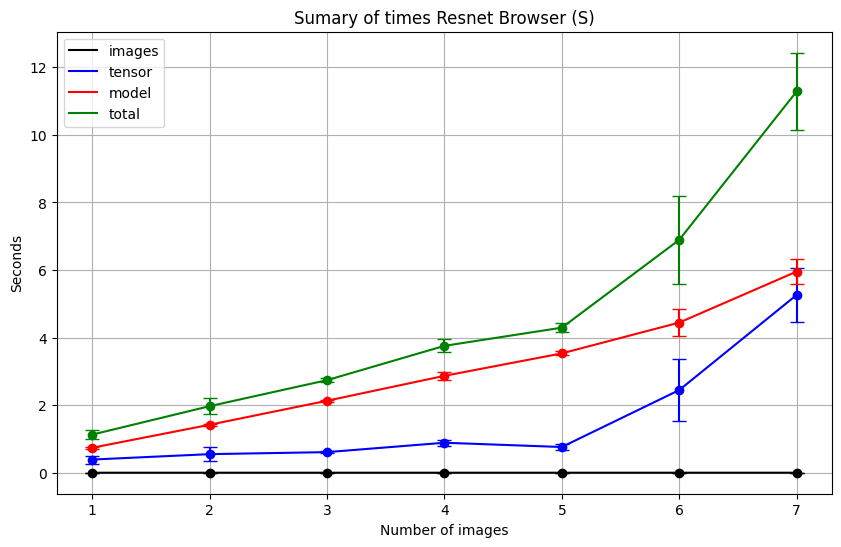

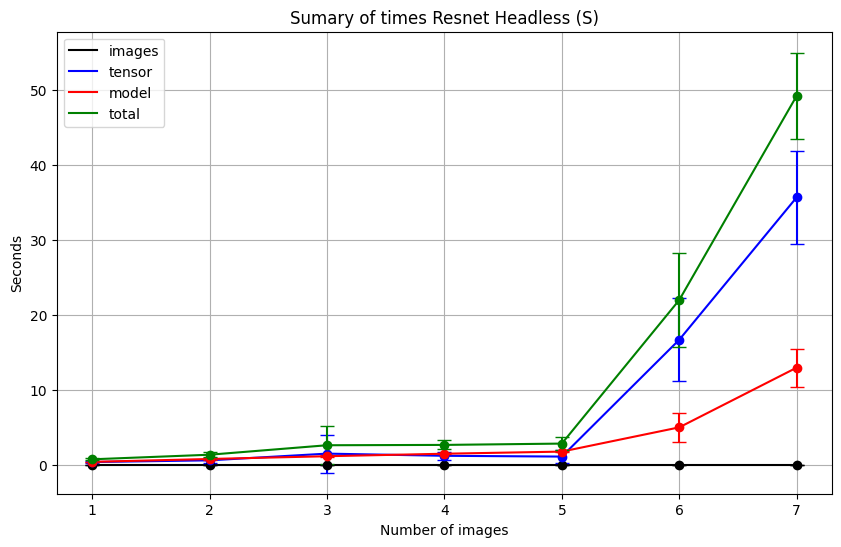

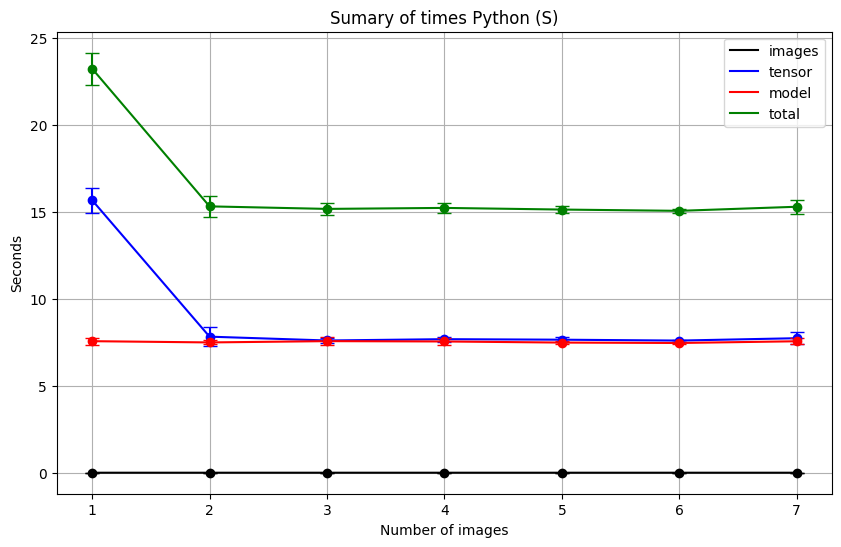

In [106]:
plotDatasetTimes(browserTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Browser (S)")
plotDatasetTimes(headlessTimesArray,"Number of images", "Seconds", "Sumary of times Resnet Headless (S)")
plotDatasetTimes(pythonTimesArray,"Number of images", "Seconds", "Sumary of times Python (S)")

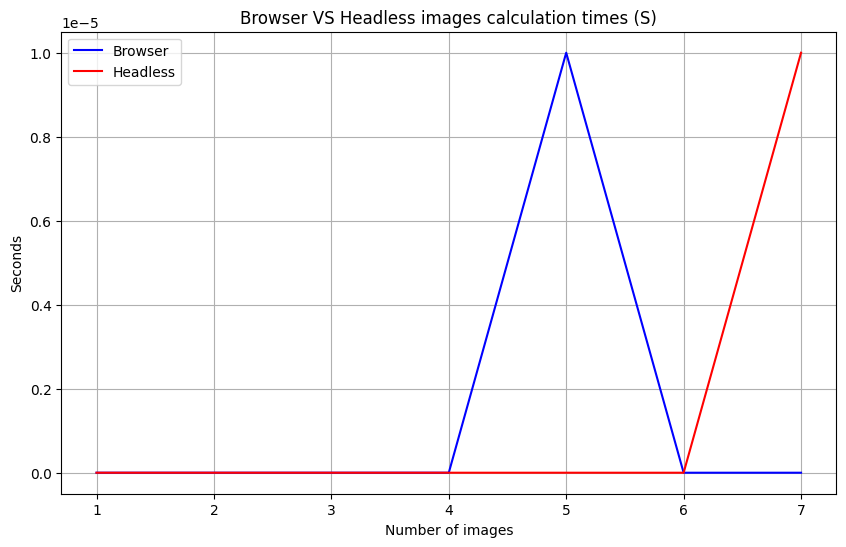

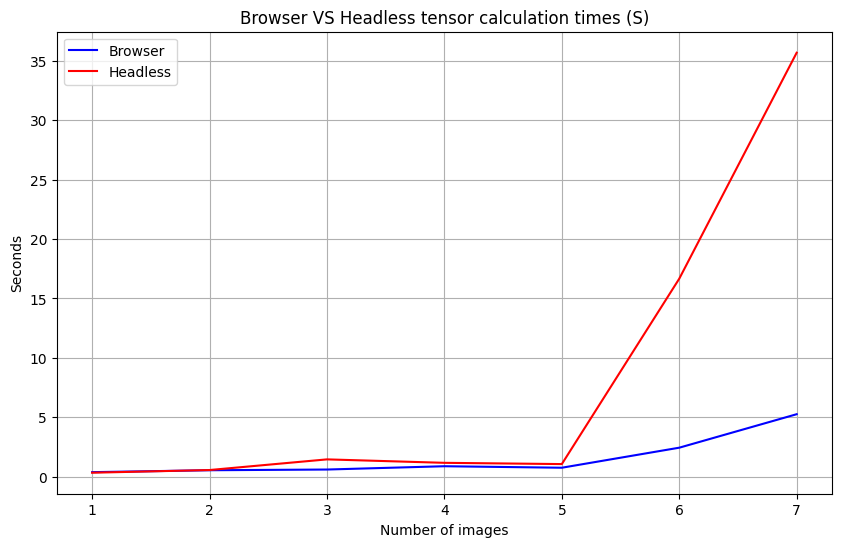

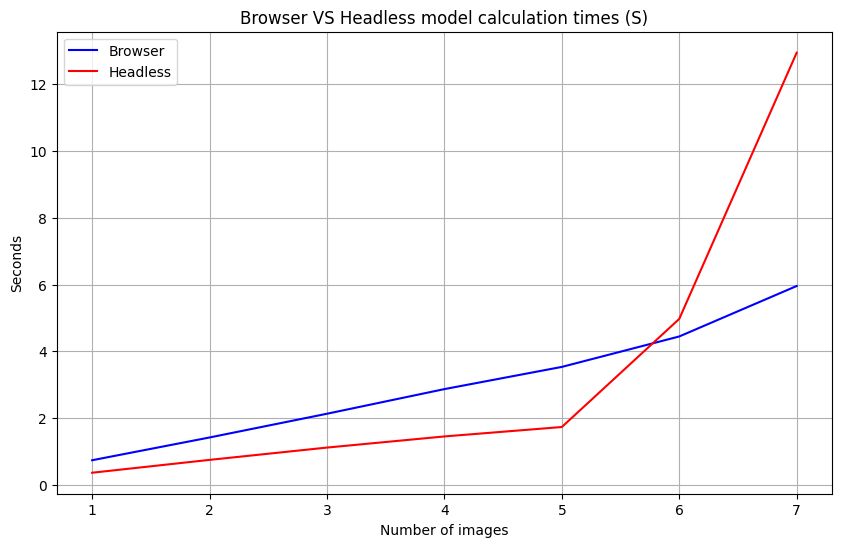

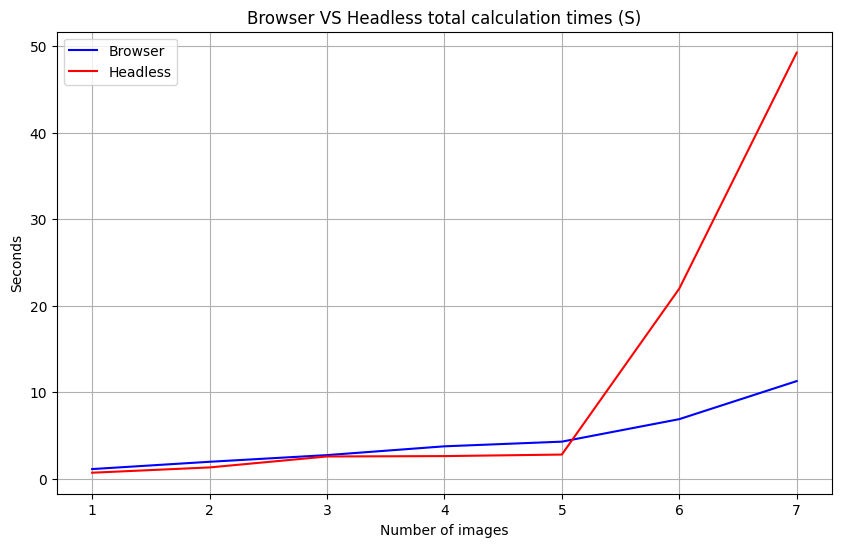

In [107]:
plotVS(browserTimesArray,headlessTimesArray,"Browser","Headless")

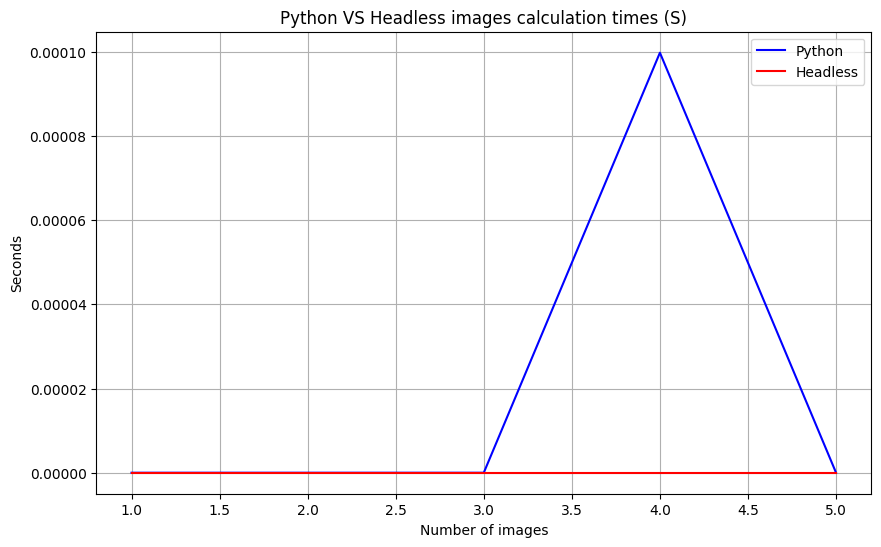

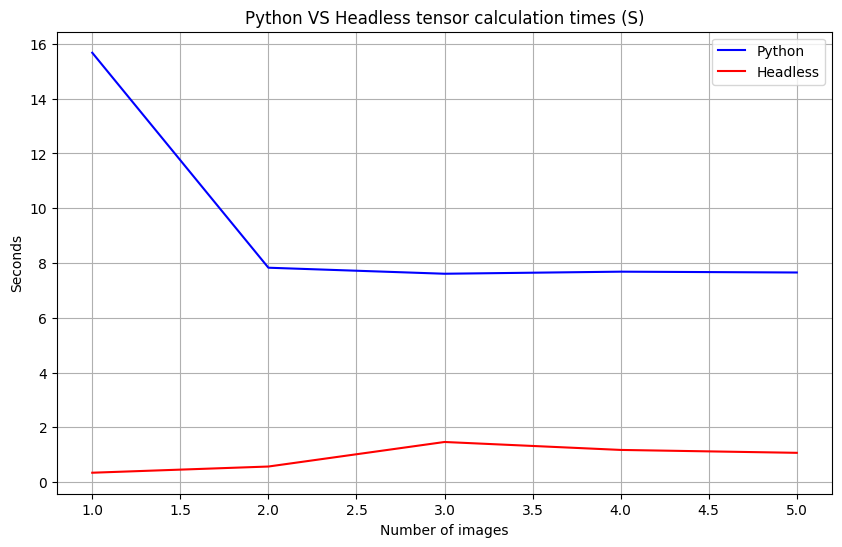

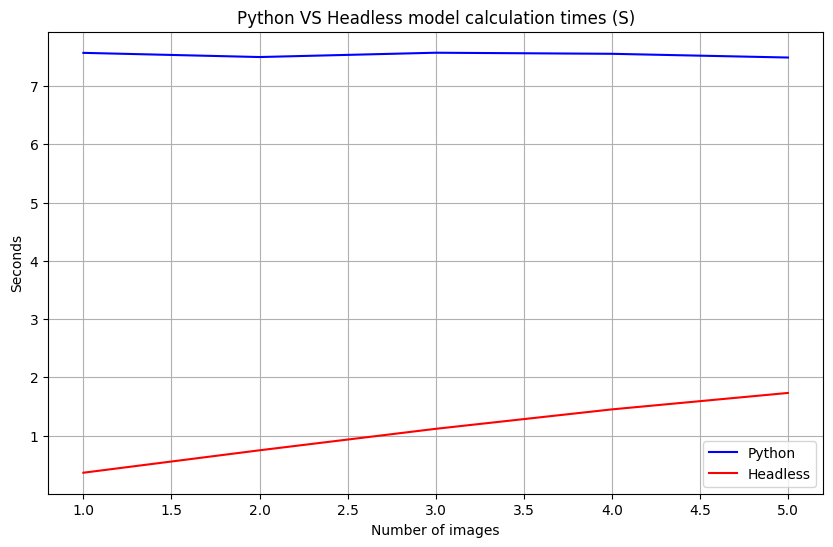

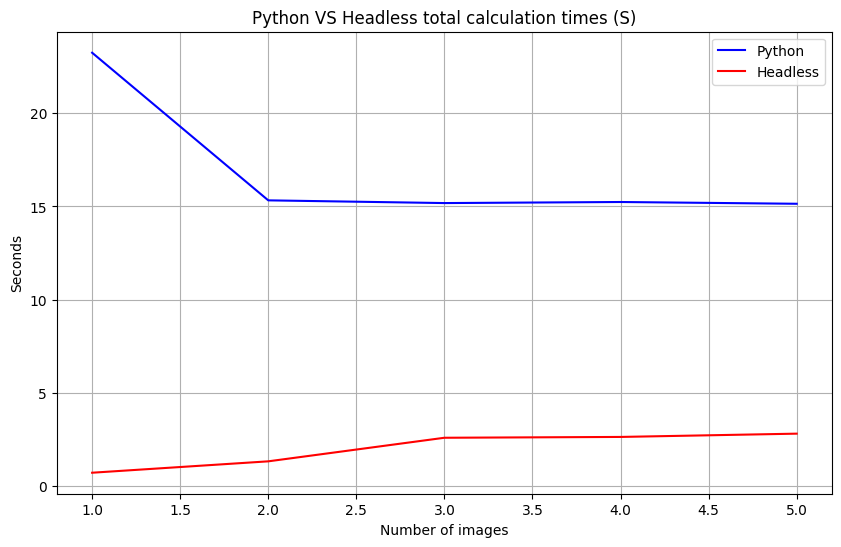

In [108]:
plotVS2(pythonTimesArray,headlessTimesArray,"Python","Headless")

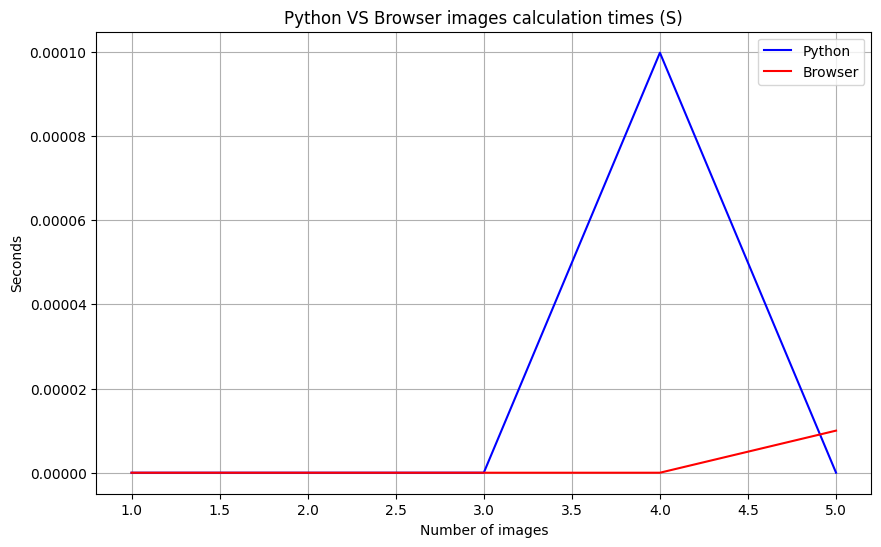

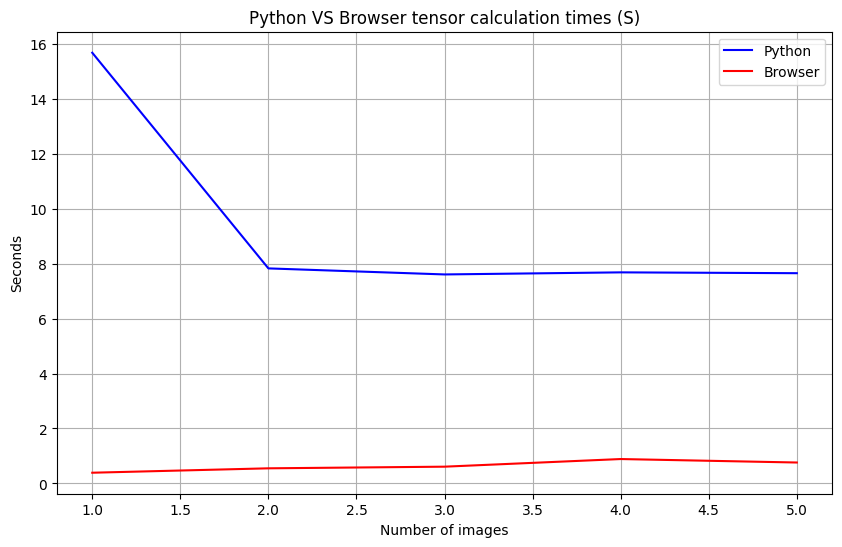

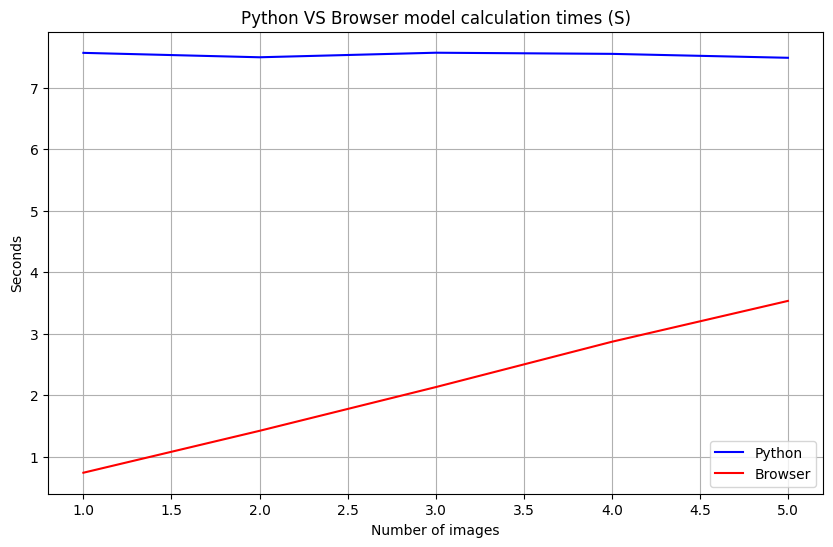

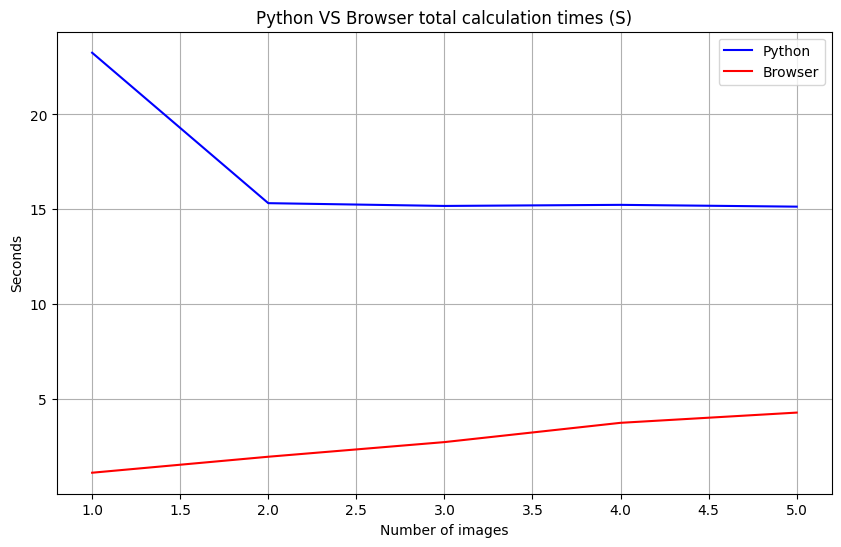

In [109]:
plotVS2(pythonTimesArray,browserTimesArray,"Python","Browser")

In [110]:
improvement_percentages_BP = calculate_improvement_between_df_sets(browserTimesArray,pythonTimesArray)
improvement_percentages_HP = calculate_improvement_between_df_sets(headlessTimesArray,pythonTimesArray)
improvement_percentages_BH = calculate_improvement_between_df_sets(browserTimesArray,headlessTimesArray)




In [111]:
print_and_average_improvements(improvement_percentages_BP)


Promedio de mejora en columna 'images' entre todos los elementos: nan%
Promedio de mejora en columna 'tensor' entre todos los elementos: 475.71%
Promedio de mejora en columna 'model' entre todos los elementos: 150.04%
Promedio de mejora en columna 'total' entre todos los elementos: 258.26%


In [112]:
print_and_average_improvements(improvement_percentages_HP)


Promedio de mejora en columna 'images' entre todos los elementos: nan%
Promedio de mejora en columna 'tensor' entre todos los elementos: 12.10%
Promedio de mejora en columna 'model' entre todos los elementos: 128.70%
Promedio de mejora en columna 'total' entre todos los elementos: 43.59%


In [113]:
print_and_average_improvements(improvement_percentages_BH)


Promedio de mejora en columna 'images' entre todos los elementos: nan%
Promedio de mejora en columna 'tensor' entre todos los elementos: 424.64%
Promedio de mejora en columna 'model' entre todos los elementos: 10.75%
Promedio de mejora en columna 'total' entre todos los elementos: 153.33%


In [114]:
improvement_percentages_BP_5 = calculate_improvement_between_df_sets_5(browserTimesArray,pythonTimesArray)
improvement_percentages_HP_5 = calculate_improvement_between_df_sets_5(headlessTimesArray,pythonTimesArray)

In [115]:
print_and_average_improvements(improvement_percentages_BP_5)


Promedio de mejora en columna 'images' entre todos los elementos: nan%
Promedio de mejora en columna 'tensor' entre todos los elementos: 1376.71%
Promedio de mejora en columna 'model' entre todos los elementos: 252.55%
Promedio de mejora en columna 'total' entre todos los elementos: 506.66%


In [116]:
print_and_average_improvements(improvement_percentages_HP_5)


Promedio de mejora en columna 'images' entre todos los elementos: nan%
Promedio de mejora en columna 'tensor' entre todos los elementos: 1253.62%
Promedio de mejora en columna 'model' entre todos los elementos: 596.60%
Promedio de mejora en columna 'total' entre todos los elementos: 816.36%
